___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project
In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 
We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).We will utilize the pipeline methods for complex tasks.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports

In [17]:
import nltk
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
# nltk.download_shell()

In [19]:
#!conda install nltk #This installs nltk
#import nltk # Imports the library
#nltk.download() #Download the necessary datasets

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [20]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [21]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [22]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [23]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [24]:
yelp['text length']= yelp['text'].apply(len)

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries.**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

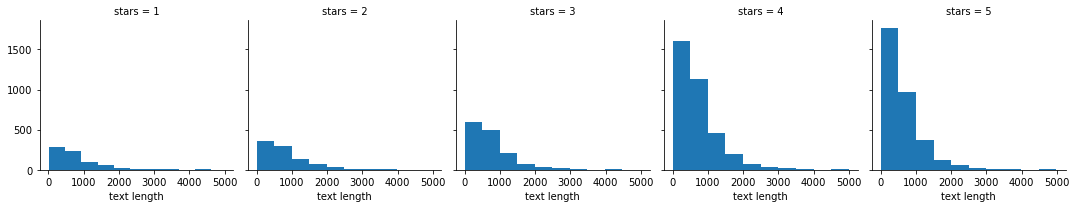

In [27]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')
plt.show()

**Create a boxplot of text length for each star category.**

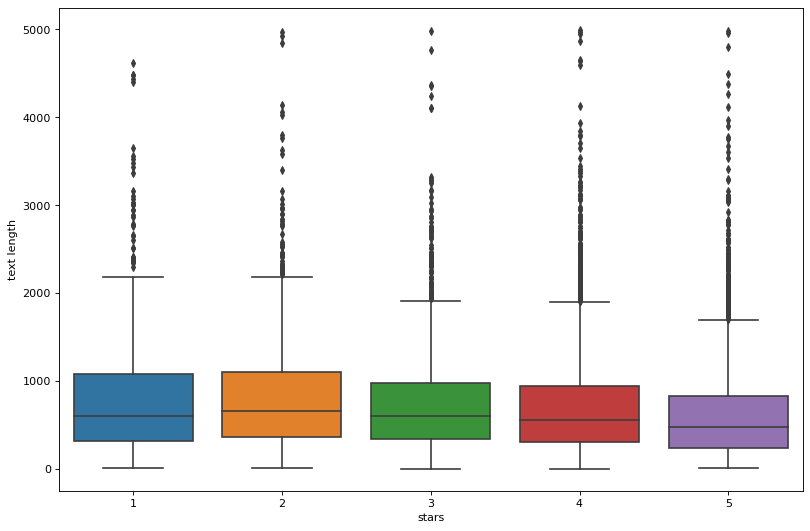

In [63]:
plt.figure(figsize=(12,8),dpi =80)
sns.boxplot(x ='stars', y = 'text length', data =yelp)
plt.show()

**Create a countplot of the number of occurrences for each type of star rating.**

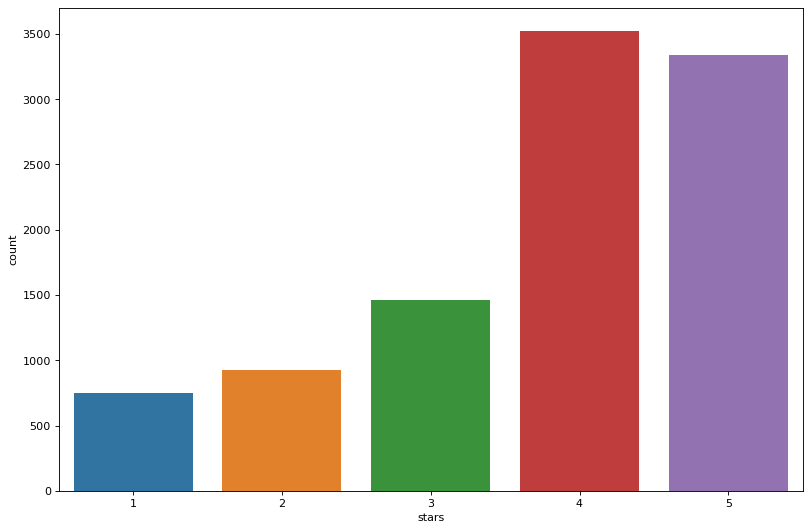

In [64]:
plt.figure(figsize=(12,8),dpi =80)
sns.countplot(x = 'stars', data = yelp)
plt.show()

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [30]:
stars_grp = yelp.groupby('stars').mean()
stars_grp

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [31]:
stars_grp.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

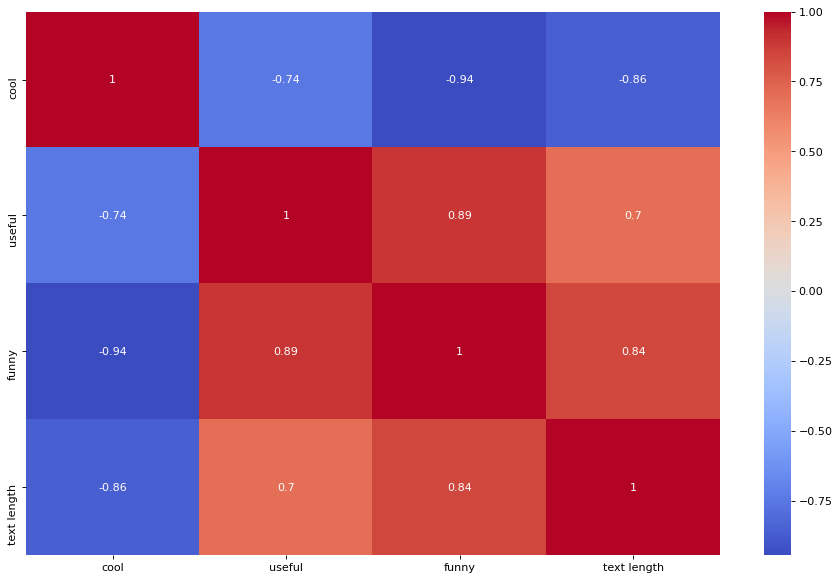

In [65]:
plt.figure(figsize=(14,9),dpi =80)
sns.heatmap(stars_grp.corr(),cmap='coolwarm',annot=True)
plt.show()

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

**Import CountVectorizer and create a CountVectorizer object.**

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

**Now fit nb using the training data.**

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

** Create a confusion matrix and classification report using these predictions and y_test **

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 

** Import Pipeline from sklearn. **

## 1. Using Classifier: MultinomialNB 

In [34]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [35]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline
**Time to use the pipeline! This pipeline has all your pre-process steps in it already.**

### Train Test Split

**Let us do the train test split on the yelp_class object.**

In [36]:
yelp_class = yelp[(yelp['stars'] == 1) |  (yelp['stars']== 5)] # Extracting subset of dataframe


In [37]:
X = yelp_class['text']
y = yelp_class['stars']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

**Now fit the pipeline to the training data.**

In [39]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now we will use the pipeline to predict from the X_test and create a classification report and confusion matrix. We should notice strange results.**

predictions = pipeline_nb.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\nchahil\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Some other things to try....**
 We noticed this model didn't do well enough. Does changing the ML model at the end to another classifier help at all?

## Changing ML Models

### Creating Data for Train and Test Split

In [58]:
yelp_class = yelp[(yelp['stars'] == 1) |  (yelp['stars']== 5)]
X = yelp_class['text']
y = yelp_class['stars']

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

### Import All Classifiers-ML Models

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Import Pipline and TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


### Import Metrics

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

### Creating Multiple Piplines

In [74]:

classifier_list= [SGDClassifier, MultinomialNB, BernoulliNB, LogisticRegression,RandomForestClassifier,
                  DecisionTreeClassifier,SVC] # SVC is slow as comapre to other classifiers

model_names = ["SGDClassifier", "MultinomialNB", "BernoulliNB", "LogisticRegression","RandomForestClassifier",
                  "DecisionTreeClassifier","SVC"] 
counter = 0

for classifier in classifier_list:
    # Creating pipline for workflow
    pipeline_new = Pipeline([('tfidf', TfidfVectorizer()),  # conevrting text to TF-IDF scores/vectors
    ('classifier', classifier()),  # train on TF-IDF vectors w/classifier
    ])
    
    # x and y needs to split each time as we need data in text for pipline (Overwrite X and y-"TfidVectorizer cnverst text 
    # into vector")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)
    
    pipeline_new.fit(X_train, y_train) # fitting 
    
    f_score = pipeline_new.score(X_test,y_test) # extracting accuracy 
   
    print ("f-score for model" +" " + model_names[counter] +" " + "in %" ":  ", f_score*100)
    
    
    if counter == 0: # printing metrics for the best models (SGDclassifier)
        predictions = pipeline_new.predict(X_test)
        print("\n","Confusion matrix for this model: ","\n", confusion_matrix(y_test,predictions))
        print("\n","Classifcation report for this mode:","\n", classification_report(y_test,predictions))
    else:
              pass
    
    counter = counter +1

f-score for model SGDClassifier in %:   95.10603588907016

 Confusion matrix for this model:  
 [[186  42]
 [ 18 980]]

 Classifcation report for this mode: 
               precision    recall  f1-score   support

           1       0.91      0.82      0.86       228
           5       0.96      0.98      0.97       998

    accuracy                           0.95      1226
   macro avg       0.94      0.90      0.92      1226
weighted avg       0.95      0.95      0.95      1226

f-score for model MultinomialNB in %:   81.40293637846656
f-score for model BernoulliNB in %:   84.09461663947798
f-score for model LogisticRegression in %:   89.31484502446982
f-score for model RandomForestClassifier in %:   84.50244698205547
f-score for model DecisionTreeClassifier in %:   81.56606851549756
f-score for model SVC in %:   91.84339314845025
